In [39]:
import os
import numpy as np
import mne
mne.set_log_level('error')
import matplotlib
import matplotlib.pyplot as plt
# matplotlib.use('TkAgg')
from scipy.stats import ttest_ind
import matplotlib.image as mpimg
from ica import ica_prepare_data, independent_comp_analysis, ica_save

Estimating rejection dictionary for eeg


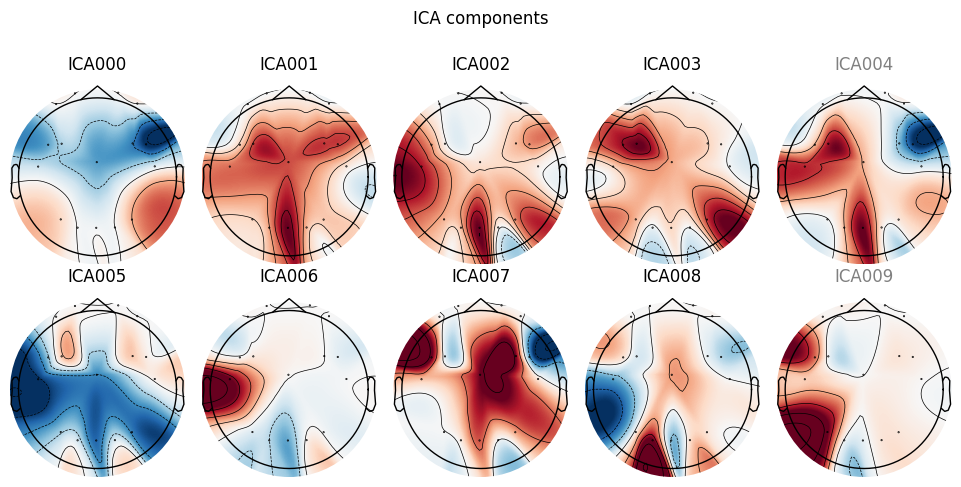

FileNotFoundError: fname does not exist: "/Users/sunniva/Documents/Alcohol_Detection_Project_2023-2024/Subjects/sub-P002/ses-S001/sub-P002_ses-S001_task-Default_run-003_eeg.fif"

In [40]:
data_dir = "/Users/sunniva/Documents/Alcohol_Detection_Project_2023-2024/Subjects/"
subject = "P002"
sessions = 2
runs = [1, 3, 4, 6]

for s in range(sessions):
    for r in runs:
        p_id = f"sub-{subject}/" + f"ses-S00{s+1}/" + f"sub-{subject}_ses-S00{s+1}_task-Default_run-00{r}"
        raw = mne.io.read_raw_fif(data_dir + p_id + "_eeg.fif", preload=True)
        raw_ica = ica_prepare_data(raw.copy())
        ica, epochs_ica = independent_comp_analysis(raw_ica)
        ica.plot_components()
        plt.close('all')  # Close the plot window for components
        ica_save(ica, p_id)